# Part II - (Ford GoBike System Dataset Exploration)
## by (Salvation Peter)

## Investigation Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I would be exploring this data, to understand it better as well as answer basic questions such as 

- When are most trips taken in terms of time of day, day of the week, or month of the year? and

- Does the above depend on if a user is a subscriber or customer?



## Dataset Overview

> The Ford GoBike System data consists of 183412 records with a total of 16 columns; 3 datetime columns, 4 float columns, 1 integer column and 8 object columns. Each of this columns give an information regarding each ride such as which bike was used, where was the starting point and ending point, how long did the ride take, etc.

> The columns include 'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'. 

> Some of these columns were read in with the wrong data type which were changed before the exploration. Also a new column was added pointing to the particular day in the week for each start_time.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Changing the data type of the start_time and end_time

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# print(df['start_time'].dtype)
# print(df['end_time'].dtype)

In [4]:
# Changing the datatype of the start and end station_ids as well as the bike ids and member_birth_year
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)

# print(df['start_station_id'].dtype)
# print(df['end_station_id'].dtype)
# print(df['bike_id'].dtype)


In [5]:
df['member_birth_year'] = pd.to_datetime(df['member_birth_year'], format='%Y')
# df['member_birth_year']

# df['member_birth_year'].dtype

In [6]:
# Creating new column to hold the day_name

df['Day'] = df['start_time'].dt.day_name()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Part 1

> Let's begin by looking at the duration_sec, the user_type, member_gender and Day columns individually


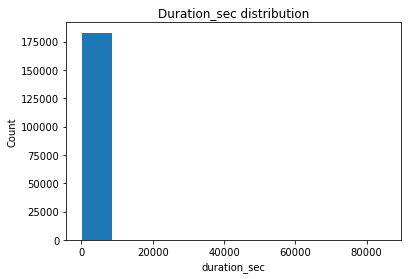

In [7]:
# This is to view the distribution of the duration_sec

df['duration_sec'].hist();
plt.grid(False);
plt.xlabel('duration_sec');
plt.ylabel('Count');
plt.title('Duration_sec distribution');

Here we notice that most ride durations fall way less than 20,000s but there are few outliers reaching upto 80,000s

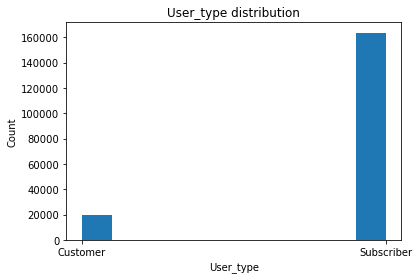

In [8]:
# This is to view the distribution of the user_type

df['user_type'].hist();
plt.grid(False);
plt.xlabel('User_type');
plt.ylabel('Count');
plt.title('User_type distribution');

We notice here that many riders are Subscribers than Customers

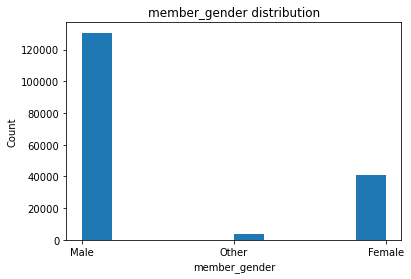

In [9]:
# This is to view the distribution of the member_gender

df['member_gender'].hist();
plt.grid(False);
plt.xlabel('member_gender');
plt.ylabel('Count');
plt.title('member_gender distribution');

We observe here that there more male riders followed by Females then Others.

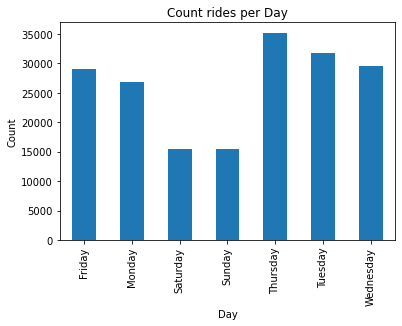

In [10]:
# This is to view the distribution of the Day

df_day = df.groupby('Day')['duration_sec'].count()

df_day.plot(kind='bar');
plt.grid(False);
plt.xlabel('Day');
plt.ylabel('Count');
plt.title('Count rides per Day');

It is evident that there are more rides on Thursday than any other day of the week

## Part 2

> How are these distributions related to each other? 
 Can they shed more light on the dataset?


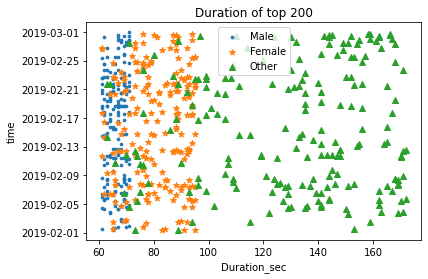

In [11]:
# ride duration for the top 200 rides in each gender class

df_male = df[df['member_gender']=='Male'].sort_values(by='duration_sec')
df_female = df[df['member_gender']=='Female'].sort_values(by='duration_sec')
df_other = df[df['member_gender']=='Other'].sort_values(by='duration_sec')


plt.scatter(df_male['duration_sec'][:200], df_male['start_time'][:200], s=7,marker='o');
plt.scatter(df_female['duration_sec'][:200], df_female['start_time'][:200], marker='*');
plt.scatter(df_other['duration_sec'][:200], df_other['start_time'][:200], marker='^');

plt.title('Duration of top 200');
plt.xlabel('Duration_sec');
plt.ylabel('time');
plt.legend(['Male','Female','Other']);

Top 200 males have their mean ride duration less than 80s, females about 100s and others take up to 160s

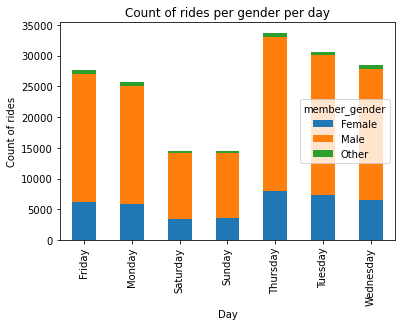

In [12]:
# Count of rides per gender per day

df.groupby(['member_gender', 'Day'])['duration_sec'].count().unstack('member_gender').sort_values(by='Day').plot(kind='bar', stacked=True);
plt.title('Count of rides per gender per day');
plt.ylabel('Count of rides');

Males have more rides across the days followed by Females

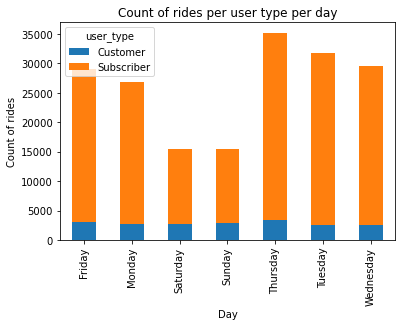

In [13]:
# Count of rides per gender per day

df.groupby(['user_type', 'Day'])['duration_sec'].count().unstack('user_type').sort_values(by='Day').plot(kind='bar', stacked=True);
plt.title('Count of rides per user type per day');
plt.ylabel('Count of rides');

Subscribers have more rides across the days

## Part 3

> Here we look at a more detailed version of the visualizations above. This would really give answers to the questions asked earlier.

- What is the average duration of rides per day per gender class?

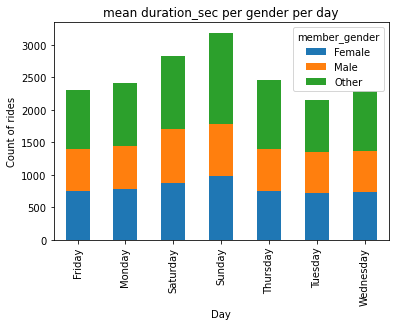

In [14]:
df.groupby(['member_gender', 'Day'])['duration_sec'].mean().unstack('member_gender').sort_values(by='Day').plot(kind='bar', stacked=True);
plt.title('mean duration_sec per gender per day');
plt.ylabel('Count of rides');

Here we see that Sunday records the day with the highest average with the 'Other' gender class topping the average duration among the gender classes. This implies that people are more relaxed on their rides on Sunda than other days.

- What is the average duration of rides per day per user type?

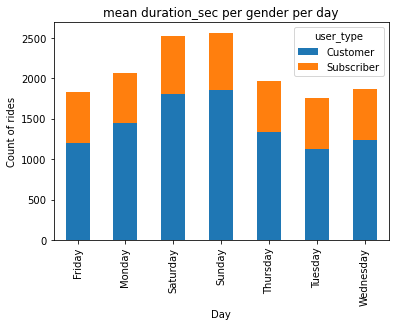

In [15]:
df.groupby(['user_type', 'Day'])['duration_sec'].mean().unstack('user_type').sort_values(by='Day').plot(kind='bar', stacked=True);
plt.title('mean duration_sec per gender per day');
plt.ylabel('Count of rides');

It is evident from the last chart that the user type customer has the highest mean duration of rides across the days. This gives an understanding that Subscribers either try to maximize the hours the subscribed to and hence ride fast or short distances compared to the customers. This though is not a reliable conclusion as the data is not able to prove this.

- The last major question we need to look at is What is the mean duration of rides per user type per gender class irrespective of the day?

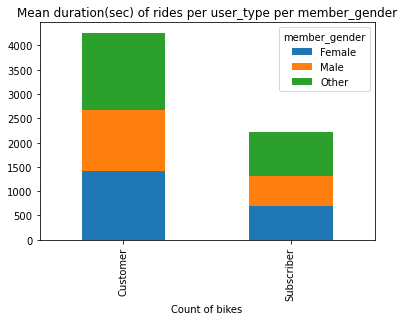

In [16]:
# fig = plt.figure(figsize = (10,10))
# ax = fig.gca()
# df.groupby(['user_type','member_gender'])['duration_sec'].mean().sort_values(ascending=False)[:100].unstack('member_gender').plot(kind='bar', ax=ax, stacked=True)
df.groupby(['user_type','member_gender'])['duration_sec'].mean().sort_values(ascending=False)[:100].unstack('member_gender').plot(kind='bar', stacked=True)
plt.xlabel('Count of bikes')
plt.title('Mean duration(sec) of rides per user_type per member_gender');

From the last chart above we notice that a higher ratio of the gender classes are customers and their mean duration of rides are much lesser across the gender classes of subscribers.

This conclusion is a response to the questions posed at the begining of this presentation, most rides were taken on Thursday even though the mean duration on this day is low. 

Sunday followed closely by Saturday ranks top days with the highest mean duration of rides. This could imply that the riders are more relaxed on their rides on Saturday and Sunday than on Thursday and other days. 

In the visualizations, it is obvious that the customers had a higher mean duration than the subscribers which is also quite understandable in that subscribers may be limited in how long they can have a ride despite their being relaxed or not. 


In [18]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt